## ACF PACF 이론

### 자기상관 함수(ACF) 및 부분 자기상관 함수(PACF)
### 자기상관 함수(Autocorrelation Function) / 부분 자기상관 함수(Partial Autocorrelation Function)
자기회귀(autoregression)를 진행하기 전에, 시계열의 시차(shifted) 샘플에 대한 공분산(covariance) 및 상관(correlation)을 알아봐야함.

| 항목 | 설명 |
|------|------|
| ACF(자기상관 함수) | 1차원 배열에 대한 자기상관 함수 |
| PACF(부분 자기상관 함수) | 부분 자기상관 추정치 |
| 목표 | ACF 및 PACF 차트를 생성하고, 계절성이 있는 시계열과 계절성이 없는 시계열에 대해 이러한 차트를 생성하며, ARIMA의 PQD 주문을 계산 |
| 관련 함수 | <a href="https://www.statsmodels.org/stable//api.html#statsmodels-tsa-api">stattools.acovf, stattools.acf, stattools.pacf, stattools.pacf_yw, stattools.pacf_ols</a> |
| 관련 플롯 메소드 | <a href="https://www.statsmodels.org/stable/graphics.html#time-series-plots"> tsaplots.plot_acf, tsaplots.plot_pacf</a> |
| 추가 읽을거리 | <a href='https://en.wikipedia.org/wiki/Autocovariance'>자기공분산 위키피디아</a><br/><a href='https://otexts.com/fpp2/autocorrelation.html'>Forecasting: Principles and Practice - 자기상관</a><br/><a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm'>NIST 통계 핸드북 - 부분 자기상관</a> |

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv('./Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df2 = pd.read_csv('./Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


___
### 1D의 자기공분산
결정론적 과정에서는 $y=sin(x)$와 같이 주어진 값 $x$에 대한 $y$의 값을 항상 알 수 있습니다. 

그러나 확률론적 과정에서는 항상 약간의 무작위성이 존재하기 때문에 $y$의 값을 알 수 없습니다. 

대신 시스템의 과거(또는 지연된) 동작을 분석하여 $\hat{y}$에 대한 확률적 추정치를 도출합니다.

유용한 설명자 중 하나는 공분산입니다. 

종속 및 독립 변수인 $x$와 $y$에 대해 이야기할 때, 

공분산은 $x$의 분산이 $y$의 분산과 어떻게 관련되어 있는지를 설명합니다. 

여기서 공분산의 크기는 $x$와 $y$가 매우 다른 척도를 가질 수 있으므로 그다지 중요하지 않습니다. 

그러나 공분산이 양수이면 $x$와 $y$가 같은 방향으로 변화하고 있으며 서로 연관되어 있을 수 있다는 뜻입니다.

시계열에서 $x$는 고정된 간격입니다. 여기서는 $y_{t+k}$의 지연 또는 시프트된 값에 대한 $y_t$의 분산을 살펴보고자 합니다.

고정 시계열의 경우, $\gamma$(gamma)에 대한 공분산 함수는 다음과 같이 주어집니다:

${\displaystyle {\gamma}_{XX}(t_{1},t_{2})=\operatorname {Cov} \left[X_{t_{1}},X_{t_{2}}\right]=\operatorname {E} [(X_{t_{1}}-\mu _{t_{1}})(X_{t_{2}}-\mu _{t_{2}})]}$

특정 $\gamma_k$를 계산할 수 있습니다:

${\displaystyle \gamma_k = \frac 1 n \sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})}$.
___

### 자기 공분산 예제:
다섯 개의 관측값이 있는 시계열이 있다고 가정해봅시다: {13, 5, 11, 12, 9}.<br>
우리는 $n = 5$, 평균 $\bar{y} = 10$, 분산 $\sigma^2 = 8$임을 빠르게 알 수 있습니다.<br>
다음 계산은 공분산 값을 제공합니다:
<br><br>
$\gamma_0 = \frac {(13-10)(13-10)+(5-10)(5-10)+(11-10)(11-10)+(12-10)(12-10)+(9-10)(9-10)} 5 = \frac {40} 5 = 8.0 \\
\gamma_1 = \frac {(13-10)(5-10)+(5-10)(11-10)+(11-10)(12-10)+(12-10)(9-10)} 5 = \frac {-20} 5 = -4.0 \\
\gamma_2 = \frac {(13-10)(11-10)+(5-10)(12-10)+(11-10)(9-10)} 5 = \frac {-8} 5 = -1.6 \\
\gamma_3 = \frac {(13-10)(12-10)+(5-10)(9-10)} 5 = \frac {11} 5 = 2.2 \\
\gamma_4 = \frac {(13-10)(9-10)} 5 = \frac {-3} 5 = -0.6$
<br><br>
$\gamma_0$는 단지 모집단 분산 $\sigma^2$임을 주목하세요.

statsmodels가 동일한 결과를 주는지 확인해봅시다! 이를 위해 <strong>가짜</strong> 데이터를 생성해보겠습니다:
___


In [ ]:
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})
arr = acovf(df['a'])
arr

array([ 8. , -4. , -1.6,  2.2, -0.6])

시계열 데이터 분석에서 1차원 데이터의 자기 공분산(Autocovariance)에 대해 이해하는 것은 중요합니다. 자기 공분산은 데이터의 시간 지연(lag)에 따른 상관 관계를 측정하는 지표입니다. 이를 쉽게 설명하겠습니다.

### 1. 시계열 데이터

시계열 데이터는 시간 순서에 따라 수집된 데이터입니다. 예를 들어, 주식 가격, 날씨 기록, 월별 판매량 등이 있습니다. 시계열 데이터의 각 데이터 포인트는 시간의 순서에 따라 배열됩니다.

### 2. 자기 공분산(Autocovariance)

자기 공분산은 시계열 데이터에서 특정 시간 지연(lag) 만큼 떨어진 두 시점 간의 공분산을 의미합니다. 공분산은 두 변수 간의 선형 관계를 나타내며, 자기 공분산은 시간 지연된 자기 자신과의 관계를 나타냅니다.

### 3. 수학적 정의

자기 공분산 함수는 일반적으로 다음과 같이 정의됩니다:

$
\gamma(k) = \frac{1}{N-k} \sum_{t=1}^{N-k} (x_t - \mu)(x_{t+k} - \mu)
$

여기서:
- $ \gamma(k) $: 시간 지연 \(k\)에서의 자기 공분산
- $ x_t $: 시간 \(t\)에서의 시계열 값
- $ \mu $: 시계열 데이터의 평균
- $ N $: 시계열 데이터의 총 길이
- $ k $: 시간 지연(lag)

### 4. 직관적인 이해

- **시간 지연 \(k=0\)**: 자기 공분산은 데이터의 분산과 같습니다. 이는 데이터가 평균으로부터 얼마나 퍼져 있는지를 나타냅니다.
- **시간 지연 \(k>0\)**: 자기 공분산은 시간 \(t\)와 시간 \(t+k\)에서의 데이터 값들이 얼마나 유사한지를 나타냅니다. 양의 자기 공분산 값은 두 시점의 값이 비슷한 경향이 있음을 의미하며, 음의 값은 두 시점의 값이 반대 방향으로 움직이는 경향이 있음을 의미합니다.

### 5. 예시

예를 들어, 일일 온도 데이터가 있다고 가정해봅시다. 만약 하루 전의 온도가 오늘 온도에 영향을 미친다면, \(k=1\)에서의 자기 공분산은 양수일 것입니다. 즉, 오늘과 어제의 온도가 비슷한 경향이 있다는 것입니다. 반면, 만약 한 달 전의 온도와 오늘의 온도가 관련이 없다면, \(k=30\)에서의 자기 공분산은 0에 가까울 것입니다.

### 6. 계산 방법

자기 공분산을 계산하는 단계는 다음과 같습니다:
1. 시계열 데이터의 평균을 계산합니다.
2. 각 시간 지연 \(k\)에 대해, 시간 \(t\)와 시간 \(t+k\)에서의 값들의 곱을 계산합니다.
3. 이를 평균을 기준으로 조정하여 자기 공분산 값을 구합니다.

### 요약

자기 공분산은 시계열 데이터의 시간 지연에 따른 자기 상관 관계를 측정하는 도구입니다. 이는 데이터가 시간에 따라 어떻게 변화하는지를 이해하는 데 중요한 정보를 제공합니다. 자기 공분산 값을 통해 시계열 데이터의 패턴과 구조를 파악할 수 있습니다.

___
### 1차원 자기상관
두 변수 $y_1,y_2$ 사이의 상관관계 $\rho$ (rho)는 다음과 같이 주어집니다:

### $\rho = \frac {\operatorname E[(y_1−\mu_1)(y_2−\mu_2)]} {\sigma_{1}\sigma_{2}} = \frac {\operatorname {Cov} (y_1,y_2)} {\sigma_{1}\sigma_{2}}$,

여기서 $E$는 기대 연산자, $\mu_{1},\sigma_{1}$ 및 $\mu_{2},\sigma_{2}$는 $y_1$과 $y_2$의 평균과 표준 편차입니다.

단일 변수(즉, <em>자기상관</em>)를 다룰 때, $y_1$을 원래 시계열로, $y_2$를 지연된 버전으로 간주합니다. 자기상관에서는 전체 모집단 평균인 $\bar y$를 사용하며, 지연된 요소들의 축소된 집합의 평균을 사용하지 않습니다(아래 참고 참조).

따라서 시간 지연 $k$에서의 시계열에 대한 $\rho_k$의 공식은 다음과 같습니다:

${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$

이는 공분산 상수 $\gamma_k$로 다음과 같이 표현될 수 있습니다:

${\displaystyle \rho_k = \frac {\gamma_k n} {\gamma_0 n} = \frac {\gamma_k} {\sigma^2}}$

예를 들어,<br>
$\rho_4 = \frac {\gamma_4} {\sigma^2} = \frac{-0.6} {8} = -0.075$

ACF 값은 -1과 1 사이에 제한됩니다. 즉, ${\displaystyle -1 \leq \rho_k \leq 1}$


In [9]:
arr3 = acf(df['a'])
arr3

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

### 부분 자기상관
부분 자기상관은 두 변수 모두에 영향을 미치는 다른 변수(들)의 효과를 제거한 후 한 변수의 선형 의존성을 측정합니다. 즉, 시차 $k$에서의 부분 자기상관은 $1$부터 $k−1$까지의 시차에 의해 설명되지 않는 $y_t$와 $y_{t+k}$ 사이의 자기상관입니다.

일반적인 방법은 비재귀적인 <a href='https://en.wikipedia.org/wiki/Autoregressive_model#Calculation_of_the_AR_parameters'>Yule-Walker 방정식</a>을 사용하는 것입니다:

$\phi_0 = 1\\
\phi_1 = \rho_1 = -0.50\\
\phi_2 = \frac {\rho_2 - {\rho_1}^2} {1-{\rho_1}^2} = \frac {(-0.20) - {(-0.50)}^2} {1-{(-0.50)}^2}= \frac {-0.45} {0.75} = -0.60$
___

$k$가 증가함에 따라, 우리는 샘플 자기상관 $\rho$를 <a href='https://en.wikipedia.org/wiki/Toeplitz_matrix'>토플리츠</a> 대각선 상수 행렬로 매핑하는 <a href='https://en.wikipedia.org/wiki/Levinson_recursion'>레빈슨-더빈 재귀</a> 알고리즘을 사용하여 행렬 대수를 통해 $\phi_k$를 구할 수 있습니다.


$\displaystyle \begin{pmatrix}\rho_0&\rho_1&\cdots &\rho_{k-1}\\
\rho_1&\rho_0&\cdots &\rho_{k-2}\\
\vdots &\vdots &\ddots &\vdots \\
\rho_{k-1}&\rho_{k-2}&\cdots &\rho_0\\
\end{pmatrix}\quad \begin{pmatrix}\phi_{k1}\\\phi_{k2}\\\vdots\\\phi_{kk}\end{pmatrix}
\mathbf = \begin{pmatrix}\rho_1\\\rho_2\\\vdots\\\rho_k\end{pmatrix}$
___

### 1. 기본 개념 이해

먼저, 자기상관(Autocorrelation)은 시계열 데이터에서 시간 지연(lag)에 따른 데이터 포인트 간의 상관 관계를 측정합니다. 예를 들어, 오늘의 주식 가격이 어제의 주식 가격과 얼마나 관련이 있는지를 측정하는 것이죠.

하지만 부분 자기상관은 조금 다릅니다. 부분 자기상관은 특정 시간 지연 $k$에서의 상관 관계를 측정할 때, 그 사이에 있는 다른 모든 시간 지연의 영향을 제거한 후의 상관 관계를 측정합니다.

### 2. 부분 자기상관의 필요성

자기상관만을 사용할 때, 특정 시간 지연에서의 상관 관계가 그 이전 시간 지연들의 영향을 받을 수 있습니다. 예를 들어, 오늘의 주식 가격이 어제의 가격과, 그제의 가격과 모두 관련이 있을 때, 단순 자기상관으로는 그 관계를 명확히 이해하기 어렵습니다. 부분 자기상관은 이러한 간접적인 영향을 제거하여 직접적인 상관 관계를 측정합니다.

### 3. 예시로 이해하기

가상의 시계열 데이터를 생각해봅시다:

- $ x_1, x_2, x_3, x_4, \ldots $

여기서 우리는 오늘의 값 $ x_t $와 두 날 전의 값 $ x_{t-2} $ 간의 직접적인 관계를 알고 싶습니다. 하지만, $ x_t $는 어제의 값 $ x_{t-1} $에도 영향을 받기 때문에, 단순 자기상관을 사용하면 $ x_{t-2} $와 $ x_t $ 간의 관계가 왜곡될 수 있습니다.

이럴 때 부분 자기상관을 사용하면 $ x_{t-2} $와 $ x_t $ 간의 직접적인 관계를, 중간에 있는 $ x_{t-1} $의 영향을 제거한 후에 측정할 수 있습니다.

### 4. 수학적 접근 (간단히)

부분 자기상관은 보통 행렬 방정식을 통해 계산되며, 이는 통계 소프트웨어나 라이브러리에서 자동으로 처리됩니다. 직접 계산할 필요는 없지만, 이해를 위해 간단히 설명하면 다음과 같습니다:

- 1차 자기상관(\(k=1\))을 구한 후,
- 2차 자기상관(\(k=2\))에서는 1차 자기상관의 영향을 제거하고,
- 3차 자기상관(\(k=3\))에서는 1차와 2차 자기상관의 영향을 제거하는 방식입니다.

### 5. 시각적 예시

부분 자기상관을 이해하는 데 도움이 되는 그래프는 부분 자기상관 함수(Partial Autocorrelation Function, PACF) 그래프입니다. 이 그래프에서는 각 시간 지연에 대한 부분 자기상관 값을 보여줍니다. 이 값을 통해 특정 시간 지연에서 직접적인 상관 관계가 있는지 쉽게 알 수 있습니다.

### 요약

- **자기상관**: 시간 지연에 따른 시계열 데이터 포인트 간의 상관 관계.
- **부분 자기상관**: 특정 시간 지연에서 직접적인 상관 관계를 측정하며, 중간에 있는 다른 시간 지연들의 영향을 제거한 상관 관계.

부분 자기상관은 시계열 분석에서 더 정확한 모델링과 예측을 위해 중요한 역할을 합니다. 데이터 간의 직접적인 관계를 파악함으로써, 시계열 데이터를 더 잘 이해하고 분석할 수 있습니다
____

In [11]:
arr4 = pacf_yw(df['a'], nlags=4, method='mle')
arr4
# 참고: 위에서는 편향된 ACF 계수를 사용하기 위해 method='mle'을 전달했습니다. "mle"는 "최대 우도 추정"
# 기본값 : method='adjusted'

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [13]:
arr5 = pacf_yw(df['a'],nlags=4,method='adjusted')
arr5

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

### OLS를 사용한 부분 자기상관
이는 Yule-Walker 대신 <a href='https://en.wikipedia.org/wiki/Ordinary_least_squares'>최소자승법</a> (OLS) 추정치를 사용하여 각 시차에 대한 부분 자기상관을 제공합니다.

In [17]:
arr6 = pacf_ols(df['a'], nlags=2)
arr6

array([ 1.        , -0.49677419, -0.43181818])

## 시각화

* .acf(df)와 .pacf_yw(df)가 반환하는 배열은 주어진 시간 $t$에서 $y$의 자기상관의 크기를 보여줍니다.
 
* Pandas에는 수평 축에 증가하는 $y_t$ 값을 그리고 수직 축에 지연된 $y_{t+1}$ 값을 그리는 내장된 시각화 함수가 있습니다.
 
*  만약 데이터셋이 비정상적이고 상승 추세를 보인다면, 인접한 값들도 동일한 방식으로 추세를 보일 것입니다.


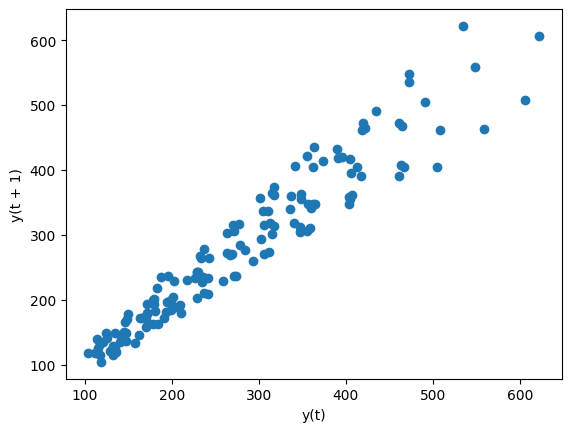

In [18]:
from pandas.plotting import lag_plot

lag_plot(df1['Thousands of Passengers']);

In [20]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df1['Thousands of Passengers'][:-1], y=df1['Thousands of Passengers'][1:], mode='markers'))
fig.show()


In [53]:
시각적으로 이는 매우 강한 자기상관의 증거를 보여줍니다. $y_t$ 값이 증가함에 따라 인접한 (지연된) 값들도 증가합니다.

이제 정상적인 <strong>일일 총 여성 출생 수</strong> 데이터셋을 살펴보겠습니다:


SyntaxError: invalid syntax (271308830.py, line 1)

## ARIMA

ARIMA(자기회귀 누적 이동평균)은 실제로 3가지 모델의 조합
* <strong>AR(p)</strong> 자기회귀 - 현재 관측치와 이전 기간의 관측치 간의 종속 관계를 활용하는 회귀 모델
* <strong>I(d)</strong> 누적 - 시계열 데이터를 정상화하기 위해 관측치의 차분(이전 시점의 관측치에서 관측치를 빼는 것)을 사용하는 것
* <strong>MA(q)</strong> 이동평균 - 지연된 관측치에 적용된 이동평균 모델의 잔차 오차와 관측치 간의 종속성을 사용하는 모델